In [5]:
def detect_word_score(text):
    very_bullish = ['booming', 'soaring', 'thriving', 'record-breaking', 
                  'explosive','breakout', 'surging', 'high','bull', 
                  'unstoppable', 'skyrocketing', 'phenomenal', 'exponential',
                  'rocketing','robust','rampant','thriving','flourishing','strong',
                  'great', 'boon','bullish','opportunity','favorable',
                  'strong','gains','optimistic']

    bullish = ['strong','promising','encouraging','momentum','positive',
             'advancing','rising','growing','healthy','solid','steady',
             'improving','rallying','ascending','bright','favorable',
             'progressive', 'uptick','encouraging','rally',
             'upswing','expansion','rebounding']

    bearish = ['weak','downturn','declining','pessimistic','sinking','stagnant',
             'uncertain','sluggish','retreating','falling','negative','soft',
             'waning','deteriorating','cautious','shaky','fragile','unstable',
             'unsustainable','tepid','negative','bearish',
             'correction','sell','decline','contraction','underperforming']

    very_bearish = ['crashing','collapsing','plummeting','meltdown','panic',
                  'freefall','bottoming','disaster','catastrophe',
                  'desperate','failing','terrible','devastating','drastic','grim',
                  'bleak','gloomy','abysmal','meltdown','collapse','recession',
                  'crash','black','selling','bloodbath','crisis','depression']
    score = 0
    text_words = text.lower().split()
    for word in text_words:
        if word in very_bullish:
            score += 2
        if word in bullish:
            score += 1
        if word in bearish:
            score -= 1
        if word in very_bearish:
            score -=2
    return score

In [6]:
import pandas as pd
df = pd.read_csv("LabeledTweets.csv")
df = df.drop(['Unnamed: 1'],axis=1)
df['Score'] = df['Content'].apply(lambda x: detect_word_score(x))

In [7]:
df

,Date,Content,Username,Target,Score
0,2023-01-03,Breaking: An abortion pill will be made more w...,WSJ,Down,0
1,2023-01-03,"Rivian fell short of its 25,000-vehicle produc...",WSJ,Down,0
2,2023-01-03,🎧 Listen: In today's episode of The Journal p...,WSJ,Down,0
3,2023-01-03,Damar Hamlin‘s charitable toy drive has raised...,WSJ,Down,0
4,2023-01-03,Federal prosecutors have charged two men in th...,WSJ,Down,0
...,...,...,...,...,...
98416,2023-04-20,Transgender Athlete Barred from Australian Wom...,zerohedge,Down,0
98417,2023-04-20,Trump's Palm Beach Mansion Next To Mar-A-Lago ...,zerohedge,Down,0
98418,2023-04-20,Disney announces groundbreaking for affordable...,YahooFinance,Down,0
98419,2023-04-20,"Fed to deliver 25-basis-point hike in May, sta...",YahooFinance,Down,0


In [8]:
df = df[df['Score']!=0]
#look at min, max, avg, and med score
df

,Date,Content,Username,Target,Score
9,2023-01-03,Rising interest rates and recession jitters di...,WSJ,Down,-1
16,2023-01-03,"Breaking: Southwest is offering 25,000 frequen...",WSJ,Down,-2
24,2023-01-03,Breaking: Sam Bankman-Fried pleaded not guilty...,WSJ,Down,-2
34,2023-01-03,"The trailer for “M3GAN,” a horror movie about ...",WSJ,Down,1
38,2023-01-03,The NFL faces a fraught decision about how to ...,WSJ,Down,-4
...,...,...,...,...,...
98375,2023-04-20,"China Evergrande, the defaulted developer tryi...",business,Down,-2
98403,2023-04-20,FED’S WILLIAMS: EXPECTS GROWTH TO STAY POSITIV...,FirstSquawk,Down,1
98404,2023-04-20,FED’S WILLIAMS: WELCOMES APPARENT DECLINE IN D...,FirstSquawk,Down,-1
98408,2023-04-20,Republicans Rally Behind Donald Trump - The Li...,zerohedge,Down,2


In [9]:
df = df.sort_values(['Score'])
Scores = list(df['Score'])
df

,Date,Content,Username,Target,Score
90808,2023-04-13,"FOMC: ""The Fed staff now expects the economy t...",zerohedge,Up,-10
44070,2023-03-14,PENTAGON ON DRONE INCIDENT OVER BLACK SEA: RUS...,FirstSquawk,Up,-8
40342,2023-03-10,Is Fed Chair Powell “willing to take a recessi...,YahooFinance,Down,-6
43680,2023-03-14,Silicon Valley Bank’s collapse is the biggest ...,business,Up,-6
46760,2023-03-15,🏦 EU to speed up work on rules for failing ban...,PriapusIQ,Up,-6
...,...,...,...,...,...
13932,2023-02-03,BOFA BULL &amp; BEAR INDICATOR AT HIGHEST LEVE...,financialjuice,Down,8
48815,2023-03-16,"CITI: THE BANKING SYSTEM HAS STRONG CAPITAL, S...",financialjuice,Up,9
28843,2023-03-02,Salesforce CEO @Benioff on his succession stra...,YahooFinance,Up,9
19118,2023-02-15,"""we will have strong retail sales print largel...",zerohedge,Up,9


In [10]:
df.to_csv('oldScoredLabeledTweets.csv')

In [11]:
import statistics
std = statistics.stdev(Scores)
mean = statistics.mean(Scores)

print('Score:')
print(f"Median: {statistics.median(Scores)}")
print(f"Mode: {statistics.mode(Scores)}")
print(f"Mean: {mean}")
print(f"Std: {std}")
print(f'Max: {max(Scores)}')
print(f'Min: {min(Scores)}')

Score:
Median: -1
Mode: -2
Mean: -0.10104782653802262
Std: 1.9206498837704356
Max: 12
Min: -10


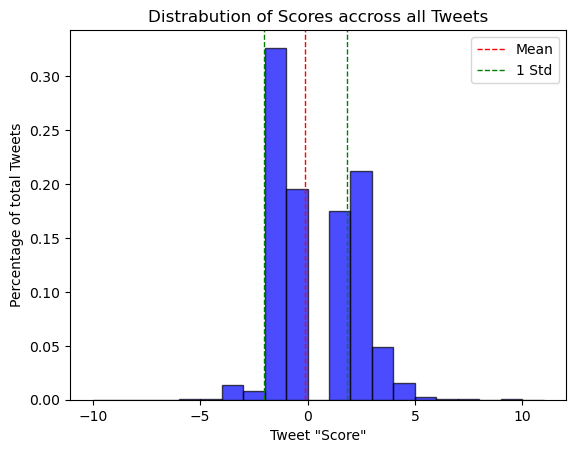

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(Scores, bins=range(min(Scores),max(Scores),1), density=True, alpha=0.7, color='blue',edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label='1 Std')
plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Tweet "Score"')
plt.ylabel('Percentage of total Tweets')
plt.title('Distrabution of Scores accross all Tweets')
plt.legend()
plt.show()

# add colors to the tweets in particular (save for EDA)

In [13]:
dayScore = df.filter(['Date','Target','Score'])
userName = df.filter(['Username'])
userName = pd.get_dummies(userName)
dayScore = dayScore.join(userName)

dayScore

,Date,Target,Score,Username_DeItaone,Username_FirstSquawk,Username_PriapusIQ,Username_Reuters,Username_WSJ,Username_YahooFinance,Username_business,Username_financialjuice,Username_unusual_whales,Username_zerohedge
90808,2023-04-13,Up,-10,0,0,0,0,0,0,0,0,0,1
44070,2023-03-14,Up,-8,0,1,0,0,0,0,0,0,0,0
40342,2023-03-10,Down,-6,0,0,0,0,0,1,0,0,0,0
43680,2023-03-14,Up,-6,0,0,0,0,0,0,1,0,0,0
46760,2023-03-15,Up,-6,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13932,2023-02-03,Down,8,0,0,0,0,0,0,0,1,0,0
48815,2023-03-16,Up,9,0,0,0,0,0,0,0,1,0,0
28843,2023-03-02,Up,9,0,0,0,0,0,1,0,0,0,0
19118,2023-02-15,Up,9,0,0,0,0,0,0,0,0,0,1


In [12]:
#turning Target to binary for 
dayScore['bTarget'] = dayScore['Target'].map({'Up': 1, 'Down': 0})
dayScore
B_dayScore = dayScore.drop('Target',axis=1)

In [13]:
B_dayScore

,Date,Score,Username_DeItaone,Username_FirstSquawk,Username_Reuters,Username_WSJ,Username_YahooFinance,Username_financialjuice,Username_unusual_whales,Username_zerohedge,bTarget
59931,2023-04-13,-10,0,0,0,0,0,0,0,1,1
33146,2023-03-14,-8,0,1,0,0,0,0,0,0,1
30540,2023-03-10,-6,0,0,0,0,1,0,0,0,0
17276,2023-02-10,-6,0,0,0,0,0,0,0,1,0
52066,2023-04-04,-5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13936,2023-02-03,8,0,0,0,0,0,1,0,0,0
19190,2023-02-15,9,0,0,0,0,0,0,0,1,1
35352,2023-03-16,9,0,0,0,0,0,1,0,0,1
25133,2023-03-02,9,0,0,0,0,1,0,0,0,1


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

test = B_dayScore.drop('Date',axis=1)
X = test.drop('bTarget',axis=1)
Y = test.filter(['bTarget'],axis=1)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4,random_state=2023)
gNB = GaussianNB().fit(X_train,Y_train.values.ravel())

In [16]:
from sklearn.metrics import mean_squared_error
Y_pred = gNB.predict(X_test)

RMSE = mean_squared_error(Y_test, Y_pred, squared = False)
accuracy = (Y_pred == Y_test.values.ravel()).sum() / len(Y_test)

print(f"Guassan NB")
print(f"Accuracy: {accuracy:.4f}")
print(f"RMSE: {RMSE:.4f}")


GuassaRMSE
Accuracy: 0.5585
RMSE: 0.6645


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2023).fit(X_train,Y_train.values.ravel())

In [18]:
Y_pred = rf.predict(X_test)
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)
accuracy = (Y_pred == Y_test.values.ravel()).sum() / len(Y_test)

print(f"Random Forest:")
print(f"Accurancy: {accuracy:.4f}")
print(f"RMSE: {RMSE:.4f}")

Random Forest:
Accurancy: 0.5434
RMSE: 0.6757


In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=2023).fit(X_train,Y_train.values.ravel())

In [20]:
Y_pred = logreg.predict(X_test)
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)
accuracy = (Y_pred == Y_test.values.ravel()).sum() / len(Y_test)

print(f"Logistic Regression:")
print(f"Accurancy: {accuracy:.4f}")
print(f"RMSE: {RMSE:.4f}")

Logistic Regression:
Accurancy: 0.5605
RMSE: 0.6630


In [21]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(random_state=2023).fit(X_train, Y_train.values.ravel())

In [22]:
Y_pred = Dtree.predict(X_test)
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)
accuracy = (Y_pred == Y_test.values.ravel()).sum() / len(Y_test)

print(f"Decision Tree:")
print(f"Accurancy: {accuracy:.4f}")
print(f"RMSE: {RMSE:.4f}")

Decision Tree:
Accurancy: 0.5405
RMSE: 0.6778
